In [78]:
# Project Image Filtering and Hybrid Images Stencil Code
# Based on previous and current work
# by James Hays for CSCI 1430 @ Brown and
# CS 4495/6476 @ Georgia Tech
import numpy as np
from numpy import pi, exp, sqrt
from skimage import io, img_as_ubyte, img_as_float32
from skimage.transform import rescale

def my_imfilter(img: np.ndarray, kernal: np.ndarray):
    
    assert kernal.size//2 !=0
#     print(np.floor(kernal.shape[0]/2),np.floor(kernal.shape[1]/2))
    if np.size(img.shape) != 2 :
#     filtered = np.zeros((img.shape[0]+int(np.floor(kernal.shape[0]/2)) ,img.shape[1]+int(np.floor(kernal.shape[1]/2)), img.shape[2]))
        filtered = np.zeros((img.shape[0] ,img.shape[1], img.shape[2]))
        print(img.shape[2])
        for r in range( img.shape[2]):
            z = np.lib.pad(img[:,:,r] , (int(np.floor(kernal.shape[0]/2)),int(np.floor(kernal.shape[1]/2))), 'constant', constant_values=(0 ,0))
            print(z.shape)
            for i in range(int(np.floor(kernal.shape[0]/2)),img.shape[0]):
                for j in range(int(np.floor(kernal.shape[1]/2)),img.shape[1]):
                    filtered[i,j,r] = np.sum(np.multiply(kernal , z[i-int(np.floor(kernal.shape[0]/2)):i+int(np.floor(kernal.shape[0]/2))+1 , j-int(np.floor(kernal.shape[1]/2)):j+int(np.floor(kernal.shape[1]/2))+1]))



    else:
        
        filtered = np.zeros((img.shape[0]+int(np.floor(kernal.shape[0]/2)) ,img.shape[1]+int(np.floor(kernal.shape[1]/2))))
        z = np.lib.pad(img , (int(np.floor(kernal.shape[0]/2)),int(np.floor(kernal.shape[1]/2))), 'constant', constant_values=(0 ,0))
        for i in range(int(np.floor(kernal.shape[0]/2)),img.shape[0]):
            for j in range(int(np.floor(kernal.shape[1]/2)),img.shape[1]):
                filtered[i,j] =np.sum(np.multiply(kernal , z[i-int(np.floor(kernal.shape[0]/2)):i+int(np.floor(kernal.shape[0]/2))+1 , j-int(np.floor(kernal.shape[0]/2)):j+int(np.floor(kernal.shape[0]/2))+1]))
        #             [np.nonzero(filtered)]
    return  filtered




In [79]:
def vis_hybrid_image(hybrid_image: np.ndarray):
    
    scales = 5
    scale_factor = 0.5
    padding = 5
    original_height = hybrid_image.shape[0]
    num_colors = 1 if hybrid_image.ndim == 2 else 3

    output = np.copy(hybrid_image)
    cur_image = np.copy(hybrid_image)
    for scale in range(2, scales+1):
        output = np.hstack((output, np.ones((original_height, padding, num_colors),
                                        dtype=np.float32)))
        # downsample image
        cur_image = rescale(cur_image, scale_factor, mode='reflect')
        # pad the top to append to the output
        pad = np.ones((original_height-cur_image.shape[0], cur_image.shape[1],num_colors), dtype=np.float32)
        tmp = np.vstack((pad, cur_image))
        output = np.hstack((output, tmp))
        return output

def load_image(path):
    return img_as_float32(io.imread(path))

def save_image(path, im):
    return io.imsave(path, img_as_ubyte(im.copy()))


3
(255, 289)
(255, 289)
(255, 289)
3
(255, 289)
(255, 289)
(255, 289)
3
(255, 289)
(255, 289)
(255, 289)
3
(255, 289)
(255, 289)
(255, 289)


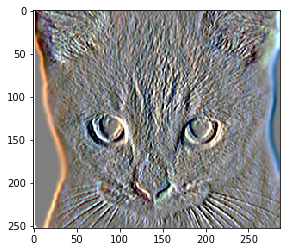

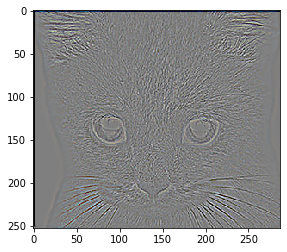

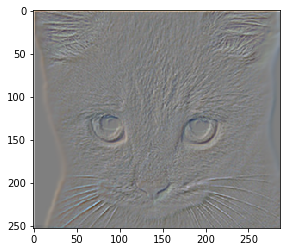

In [80]:
# Project Image Filtering and Hybrid Images - Tests on my_imfilter function
# Based on previous and current work
# by James Hays for CSCI 1430 @ Brown and
# CS 4495/6476 @ Georgia Tech
import os
from skimage.transform import rescale
import numpy as np
from numpy import pi, exp, sqrt
import matplotlib.pyplot as plt
# from helper import load_image, save_image, my_imfilter

resultsDir = '..' + os.sep + 'results'
if not os.path.exists( resultsDir ):
    os.mkdir( resultsDir )

test_image = load_image('../data/cat.bmp')
test_image = rescale(test_image, 0.7, mode='reflect' , multichannel = True)
#print(test_image.shape)

'''
Identity filter
This filter should do nothing regardless of the padding method you use.
'''
identity_filter = np.asarray([[0, 0, 0], [0, 1, 0], [0, 0, 0]], dtype=np.float32)
identity_image = my_imfilter(test_image, identity_filter)
plt.imshow(identity_image)
done = save_image('../results/identity_image.jpg', identity_image)


'''
Small blur with a box filter
This filter should remove some high frequencies.
'''
blur_filter = np.ones((3, 3), dtype=np.float32)
blur_filter /= np.sum(blur_filter, dtype=np.float32)  # making the filter sum to 1
blur_image = my_imfilter(test_image, blur_filter)
plt.imshow(blur_image)
done = save_image(resultsDir + os.sep + 'blur_image.jpg', blur_image)


'''
Large blur
This blur would be slow to do directly, so we instead use the fact that Gaussian blurs are separable and blur sequentially in each direction.
'''
# generate a gaussian kernel with any parameters of your choice. you may only in this case use a function
# from any library to generate the kernel such as: cv2.getGaussianKernel() then use the kernel to check your
# my_imfilter() implementation
# https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#Mat%20getGaussianKernel(int%20ksize,%20double%20sigma,%20int%20ktype)

## Slow (naive) version of large blur
# import time
# large_blur_filter = np.dot(large_1d_blur_filter, large_1d_blur_filter.T)
# t = time.time()
# large_blur_image = my_imfilter(test_image, large_blur_filter);
# t = time.time() - t
# print('{:f} seconds'.format(t))
##

'''
Oriented filter (Sobel operator)
'''
sobel_filter = np.asarray([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)  # should respond to horizontal gradients
sobel_image = my_imfilter(test_image, sobel_filter)

# 0.5 added because the output image is centered around zero otherwise and mostly black
sobel_image = np.clip(sobel_image+0.5, 0.0, 1.0)
plt.imshow(sobel_image)
done = save_image(resultsDir + os.sep + 'sobel_image.jpg', sobel_image)


'''
High pass filter (discrete Laplacian)
'''
laplacian_filter = np.asarray([[0, 1, 0], [1, -4, 1], [0, 1, 0]], dtype=np.float32)
laplacian_image = my_imfilter(test_image, laplacian_filter)

# added because the output image is centered around zero otherwise and mostly black
laplacian_image = np.clip(laplacian_image+0.5, 0.0, 1.0)
plt.figure(); plt.imshow(laplacian_image)
done = save_image(resultsDir + os.sep + 'laplacian_image.jpg', laplacian_image)

# High pass "filter" alternative
high_pass_image = test_image - blur_image
high_pass_image = np.clip(high_pass_image+0.5, 0.0, 1.0)
plt.figure(); plt.imshow(high_pass_image)
done = save_image(resultsDir + os.sep + 'high_pass_image.jpg', high_pass_image)
